# Emoji Recognition using RandomForest 

###  IMPORT NECESSARY LIBRARY

In [1]:
import os
import warnings 
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage.io import imshow,imread
from skimage.transform import resize
from skimage.color import rgb2gray

#### IMPORT IMAGE FILE VIA DIRECTORY

In [5]:
happy=os.listdir("emoji_img/happy")

In [6]:
sad=os.listdir("emoji_img/sad")

In [7]:
angry=os.listdir("emoji_img/angry")

In [8]:
limit=10
happy_images=[None]*limit
j=0
for i in happy:
    if (j<limit):
        happy_images[j]=imread("emoji_img/happy/"+i)
        j+=1
    else:
        break

In [9]:
limit=10
sad_images=[None]*limit
j=0
for i in sad:
    if (j<limit):
        sad_images[j]=imread("emoji_img/sad/"+i)
        j+=1
    else:
        break

In [10]:
limit=10
angry_images=[None]*limit
j=0
for i in angry:
    if (j<limit):
        angry_images[j]=imread("emoji_img/angry/"+i)
        j+=1
    else:
        break

In [11]:
limit=10
happy_gray =[None]*limit
j = 0
for i in happy:
    if (j < limit): 
        happy_gray[j]=rgb2gray(happy_images[j])
        j+=1
    else:
        break

In [12]:
limit=10
sad_gray =[None]*limit
j = 0
for i in sad:
    if (j < limit): 
        sad_gray[j]=rgb2gray(sad_images[j])
        j+=1
    else:
        break

In [13]:
limit=10
angry_gray =[None]*limit
j = 0
for i in angry:
    if (j < limit): 
        angry_gray[j]=rgb2gray(angry_images[j])
        j+=1
    else:
        break

In [14]:
happy_gray[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

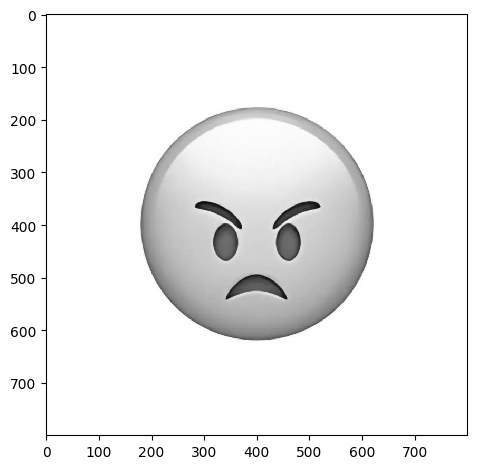

In [15]:
view=imshow(angry_gray[0])
plt.show()

### VIEW IMAGE

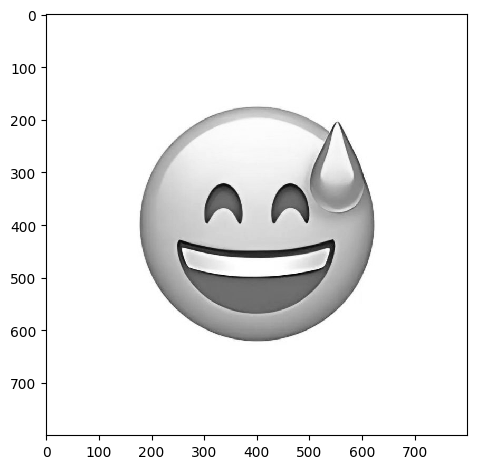

In [16]:
view=imshow(happy_gray[0])
plt.show()

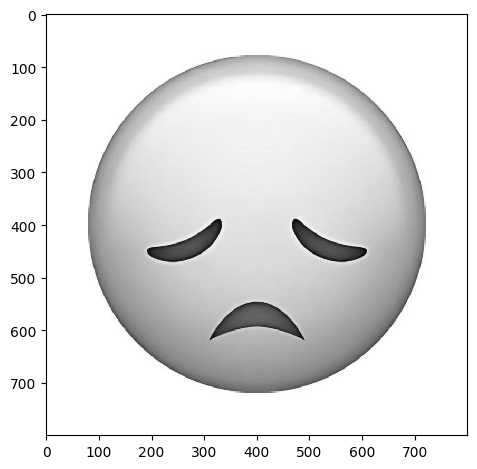

In [17]:
view=imshow(sad_gray[0])
plt.show()

## Check the image matrix size before resizing


In [18]:
angry_gray[5].shape

(800, 800)

In [19]:
happy_gray[2].shape

(800, 800)

In [20]:
sad_gray[2].shape

(800, 800)

In [21]:
angry_gray[2].shape

(800, 800)

## RESIZE IMAGE INTO 512x512

In [22]:
for j in range(10):
    happy=happy_gray[j]
    happy_gray[j]=resize(happy,(512,512))

In [23]:
for j in range(10):
    sad=sad_gray[j]
    sad_gray[j]=resize(sad,(512,512))

In [26]:
for j in range(10):
    angry=angry_gray[j]
    angry_gray[j]=resize(angry,(512,512))

### VIEW RESIZEX IMAGE

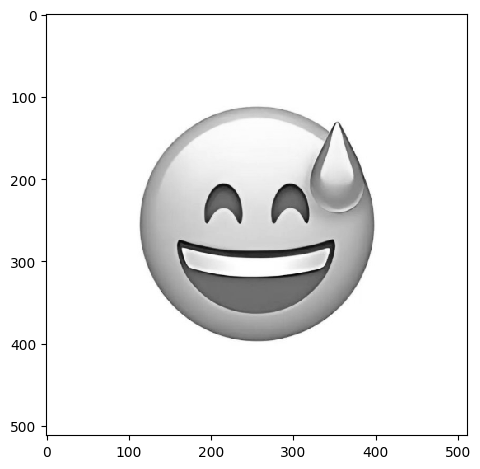

In [27]:
view=imshow(happy_gray[0])
plt.show()

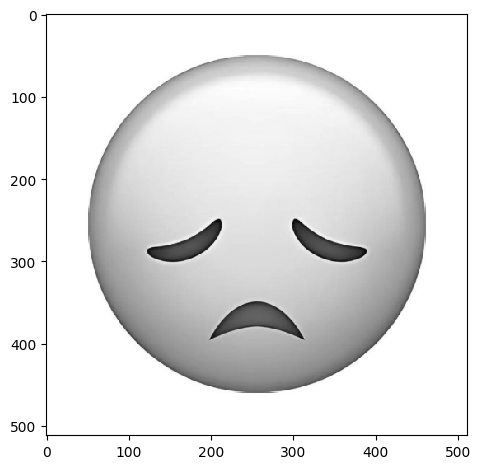

In [28]:
view=imshow(sad_gray[0])
plt.show()

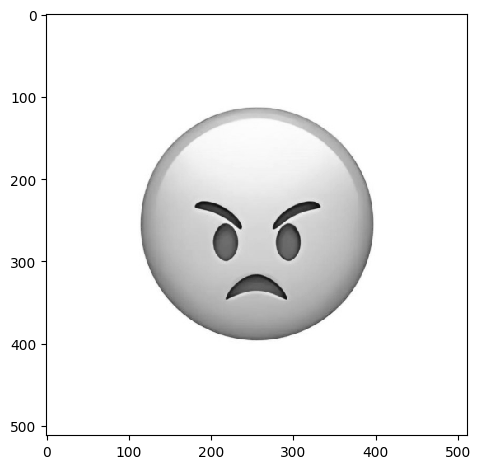

In [29]:
view=imshow(angry_gray[0])
plt.show()

## FIND NUMBER OF GRAYSCALE IMAGE

In [30]:
length_happy=len(happy_gray)
length_happy

10

In [31]:
length_sad=len(sad_gray)
length_sad

10

In [32]:
length_angry=len(angry_gray)
length_angry

10

### CREATE VARIABLE FLATTEN IMAGE FOR THREE INPUT EMOJI

In [33]:
happy_size=happy_gray[0].shape
happy_size

(512, 512)

In [34]:
sad_size=sad_gray[0].shape
sad_size

(512, 512)

In [35]:
angry_size=angry_gray[0].shape
angry_size

(512, 512)

###  FLATTEN IMAGE FOR THREE INPUT EMOJI

In [36]:
flatten_happy=happy_size[0]*happy_size[1]
flatten_happy

262144

In [37]:
flatten_sad=sad_size[0]*sad_size[1]
flatten_sad

262144

In [38]:
flatten_angry=angry_size[0]*angry_size[1]
flatten_angry

262144

### NOW FALTTEN IMAGE INTO VECTOR

In [39]:
for i in range(length_happy):
    happy_gray[i]=np.ndarray.flatten(happy_gray[i]).reshape(flatten_happy,1)

In [40]:
for i in range(length_sad):
    sad_gray[i]=np.ndarray.flatten(sad_gray[i]).reshape(flatten_sad,1)

In [41]:
for i in range(length_angry):
    angry_gray[i]=np.ndarray.flatten(angry_gray[i]).reshape(flatten_angry,1)

### STACK THE BOTH INPUT EMOJI AS ARRAY

In [42]:
happy_gray=np.dstack(happy_gray)
happy_gray

array([[[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]]])

In [43]:
sad_gray=np.dstack(sad_gray)
sad_gray

array([[[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]]])

In [44]:
angry_gray=np.dstack(angry_gray)
angry_gray

array([[[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]]])

### ROLLAXIS

In [45]:
happy_gray=np.rollaxis(happy_gray,axis=2,start=0)
happy_gray

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [46]:
sad_gray=np.rollaxis(sad_gray,axis=2,start=0)
sad_gray

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [47]:
angry_gray=np.rollaxis(angry_gray,axis=2,start=0)
angry_gray

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [48]:
happy_gray.shape

(10, 262144, 1)

In [49]:
sad_gray.shape

(10, 262144, 1)

In [50]:
angry_gray.shape

(10, 262144, 1)

In [51]:
happy_gray=happy_gray.reshape(length_happy,flatten_happy)
happy_gray

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [52]:
sad_gray=sad_gray.reshape(length_happy,flatten_happy)

In [53]:
angry_gray=angry_gray.reshape(length_angry,flatten_angry)

In [54]:
happy_data=pd.DataFrame(happy_gray)

In [55]:
happy_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [56]:
sad_data=pd.DataFrame(sad_gray)

In [57]:
sad_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
angry_data=pd.DataFrame(angry_gray)

In [59]:
angry_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
happy_data['label']='happy'

In [61]:
sad_data['label']='sad'

In [62]:
angry_data['label']='angry'

In [63]:
happy_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy


In [64]:
sad_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad


In [65]:
emoji=pd.concat([happy_data,sad_data,angry_data])

In [66]:
emoji

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy


# NOW USE SHUFFLE LIBRARY TO SHUFFLE 

In [69]:
from sklearn.utils import shuffle

In [70]:
emoji_index=shuffle(emoji).reset_index()

In [71]:
emoji_index

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
1,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
2,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
3,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
4,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
5,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
6,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,angry
7,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
8,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
9,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy


In [72]:
emoji1=emoji_index.drop(['index'],axis=1)

In [73]:
emoji1

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,angry
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sad
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,happy


emoji1.to_csv('emojidata.csv')

In [74]:
x=emoji1.values[:,:-1]
y=emoji1.values[:,-1]

## CREATE TRAINTING & TESTING SET

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
x_train.shape

(24, 262144)

In [78]:
y_train.shape

(24,)

In [79]:
x_test 

array([[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]], dtype=object)

In [80]:
y_test.shape

(6,)

### PERFORM PCA 

In [81]:
from sklearn import decomposition

In [82]:
pca=decomposition.PCA(n_components=20,whiten=True,random_state=0)

In [83]:
pca

PCA(n_components=20, random_state=0, whiten=True)

In [84]:
pca.fit(x_train)

PCA(n_components=20, random_state=0, whiten=True)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train)

In [86]:
x_test_pca=pca.transform(x_test)

In [87]:
eigen=(np.reshape(x[10],(512,512)).astype(np.float64))

In [88]:
eigen

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

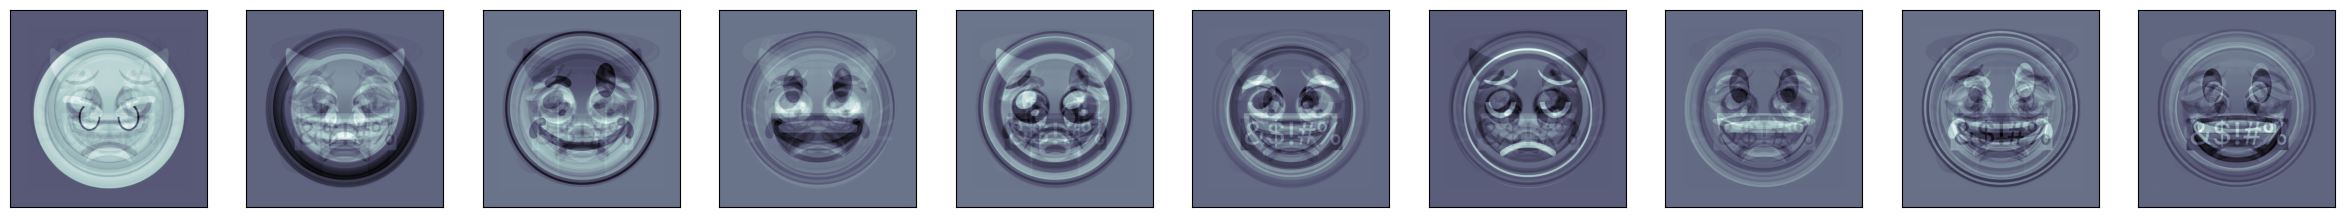

In [89]:
fig =plt.figure(figsize=(30,30))
for i in range(10):
    ex=fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ex.imshow(pca.components_[i].reshape(eigen.shape),cmap=plt.cm.bone)   
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score

In [91]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_pca, y_train)

RandomForestClassifier()

In [92]:
y_pred=rf_classifier.predict(x_test_pca)

In [93]:
y_pred

array(['angry', 'angry', 'angry', 'angry', 'sad', 'sad'], dtype=object)

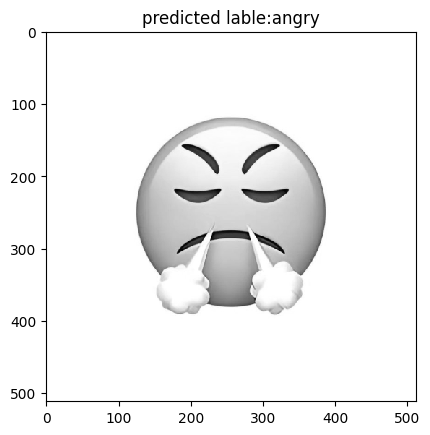

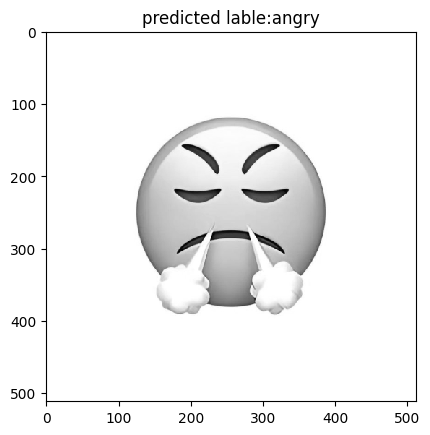

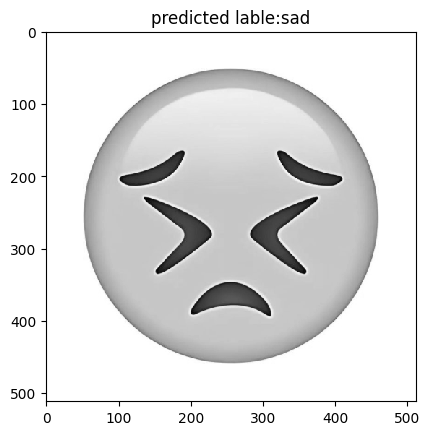

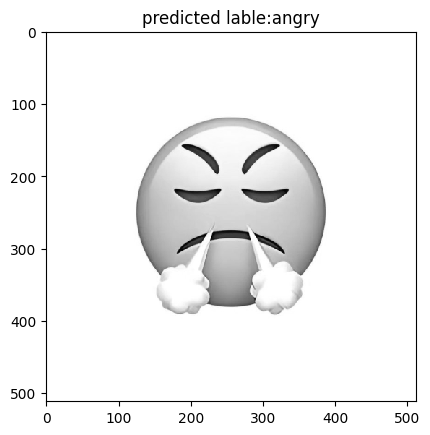

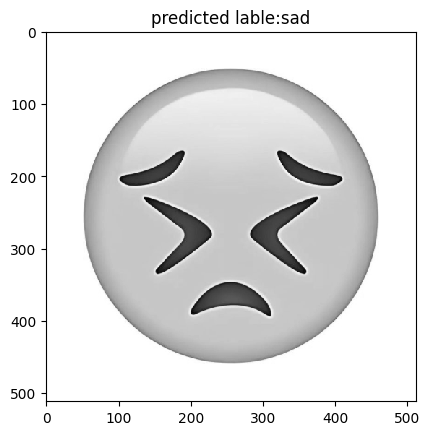

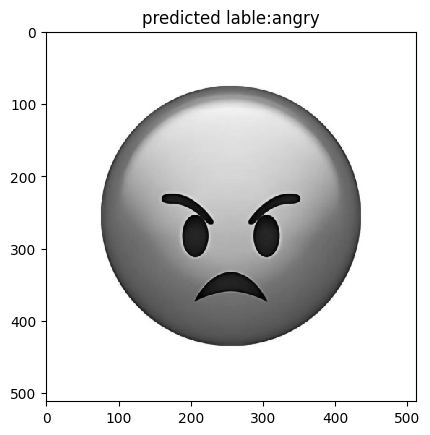

In [94]:
for i in (np.random.randint(0,6,6)):
    predicted_image=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted lable:{0}'.format(y_pred[i]))
    plt.imshow(predicted_image, interpolation='nearest',cmap='gray')
    plt.show()

In [95]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_pca, y_train)
y_pred = rf_classifier.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 83.33%
Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.67      0.80         3
       happy       1.00      1.00      1.00         1
         sad       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.89      0.89      0.87         6
weighted avg       0.89      0.83      0.83         6

